In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import plotly.express as px
import datetime
%matplotlib inline

from imblearn.over_sampling import SMOTE
from collections import Counter

------------------------------------------------------------------------------------------------------------
### Questions

#### 1. What are the vaccination and registration rates per state in Malaysia?
*a. Can use histogram + line graph (not observing rate)* <br />

#### 2. What the types and total number of side effects of each type of vaccine ?
*a. Rate of side effect in dose one and dose 2*    <br />
*b. Rate of serious side effect for each vaccine*   <br />
*c. Death rate compare with rate of serious side effect*   <br />

#### 3. Which type of vaccine is given to more people?


#### 4. Vaccination rate Vs Death rate, which one more dangerous?


-------------------------------------------------------------------------------------------------------------

In [91]:
import pickle

aefi = pickle.load(open('pickle_files/aefi.pkl', 'rb'))
aefi_serious = pickle.load(open('pickle_files/aefi_serious.pkl', 'rb'))
vax_malaysia = pickle.load(open('pickle_files/vax_malaysia.pkl', 'rb'))
vax_state = pickle.load(open('pickle_files/vax_state.pkl', 'rb'))
vaxreg_malaysia = pickle.load(open('pickle_files/vaxreg_malaysia.pkl', 'rb'))
vaxreg_state = pickle.load(open('pickle_files/vaxreg_state.pkl', 'rb'))
vax_state = pickle.load(open('pickle_files/vax_state.pkl', 'rb'))
cases_malaysia = pickle.load(open('pickle_files/cases_malaysia.pkl', 'rb'))
cases_state = pickle.load(open('pickle_files/cases_state.pkl', 'rb'))
deaths_malaysia = pickle.load(open('pickle_files/deaths_malaysia.pkl', 'rb'))
ppl = pd.read_csv('dataset/static/population_moh.csv')

In [3]:
aefi.iloc[-1]
vax_state.iloc[-1]

date                   2021-10-05 00:00:00
state                       W.P. Putrajaya
daily_partial                         1014
daily_full                             147
daily                                 1161
daily_partial_child                    925
daily_full_child                         0
cumul_partial                       137914
cumul_full                          125459
cumul                               263373
cumul_partial_child                   8298
cumul_full_child                        42
pfizer1                               1014
pfizer2                                129
sinovac1                                 0
sinovac2                                16
astra1                                   0
astra2                                   0
cansino                                  0
pending                                  2
Name: 3583, dtype: object

**1. What are the vaccination and registration ratio per state in Malaysia?**

Text(0.5, 1.0, 'Vaccination Rate per State')

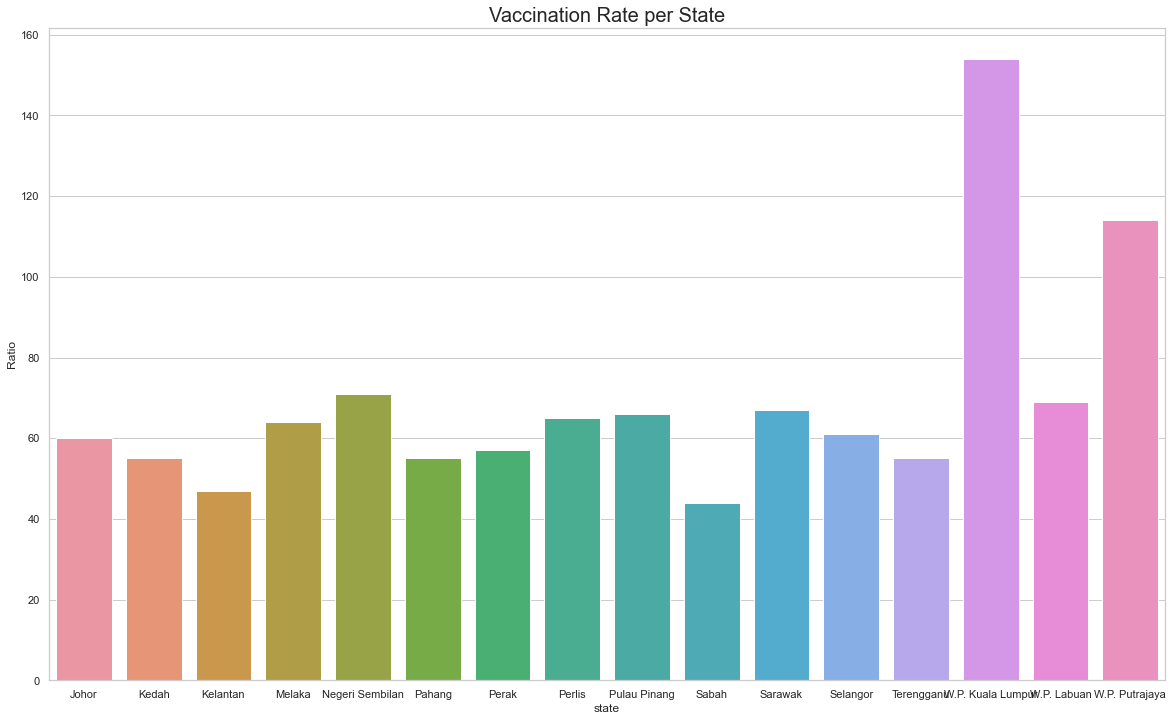

In [4]:
plt.figure(figsize=(20,12))
df = vax_state.groupby('state')['cumul_full'].max()
column = df.keys()
state = []
ratio = []
for i in column:
    ppl_num = ppl[ppl['state']==i]['pop']
    vax_num = vax_state[vax_state['state']==i]['cumul_full'].max()
    cal = int(vax_num/ppl_num * 100)
    state.append(i)
    ratio.append(cal)
df = pd.DataFrame(ratio)
df['state'] = state
df.rename(columns={0:'Ratio'},inplace=True)
ax = sns.barplot(data = df,x='state',y='Ratio')
plt.title('Vaccination Rate per State',fontdict = {'fontsize' : 20})

In [5]:
ppl

,state,idxs,pop,pop_18,pop_60,pop_12
0,Malaysia,0,32657400,23409600,3502000,3147500
1,Johor,1,3781000,2711900,428700,359900
2,Kedah,2,2185100,1540600,272500,211400
3,Kelantan,3,1906700,1236200,194100,210600
4,Melaka,4,932700,677400,118500,86500
5,Negeri Sembilan,5,1128800,814400,145000,109400
6,Pahang,6,1678700,1175800,190200,173000
7,Pulau Pinang,7,1773600,1367200,239200,141500
8,Perak,8,2510300,1862700,397300,237200
9,Perlis,9,254900,181200,35100,23100


Text(0.5, 1.0, 'Registration Rate per State')

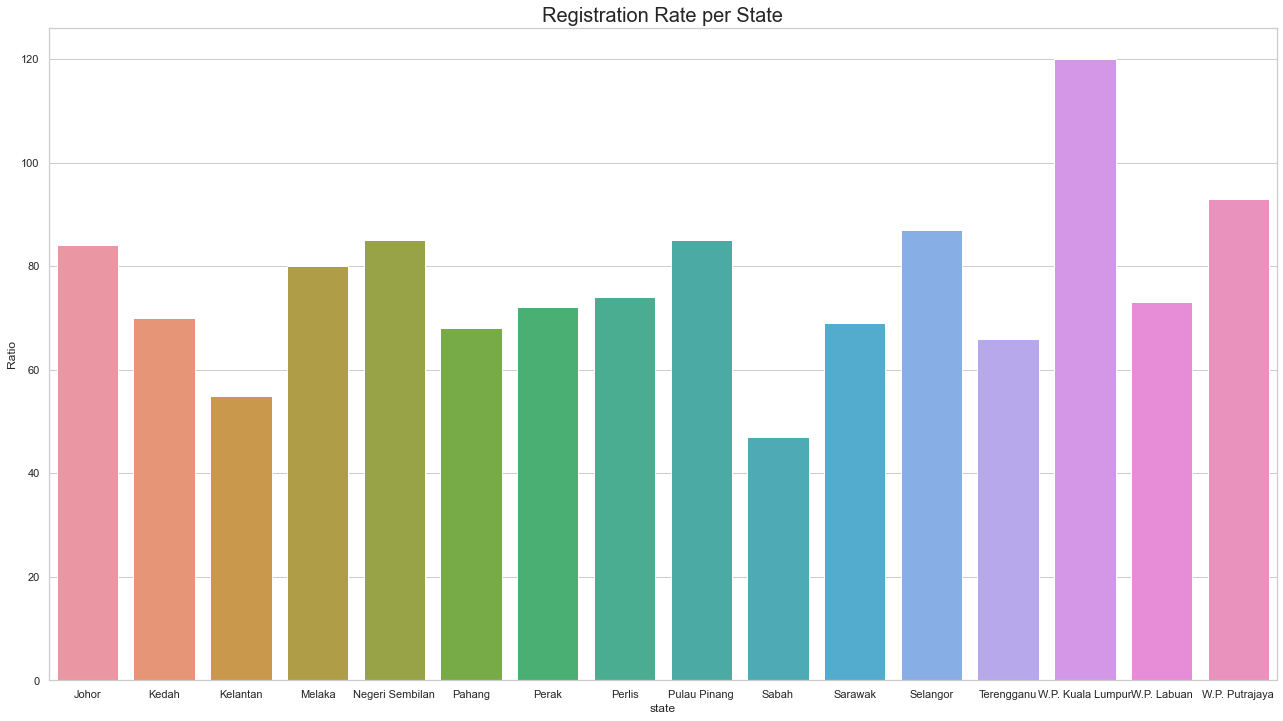

In [6]:
plt.figure(figsize=(22,12))
df = vaxreg_state.groupby('state')['total'].max()
column = df.keys()
state = []
ratio = []
for i in column:
    ppl_num = ppl[ppl['state']==i]['pop']
    vax_num = vaxreg_state[vaxreg_state['state']==i]['total'].max()
    cal = vax_num/ppl_num * 100
    state.append(i)
    ratio.append(int(cal))
df = pd.DataFrame(data=ratio,index=state)
df.reset_index(inplace=True)
df.rename(columns={'index':'state',0:'Ratio'},inplace=True)
ax = sns.barplot(data=df,x='state',y='Ratio') 
plt.title('Registration Rate per State',fontdict = {'fontsize' : 20})

**2. What the types and total number of side effects of each type of vaccine ?**

# Changes !!!!

In [92]:
vax_malaysia['pfizer'] = vax_malaysia['pfizer1'] + vax_malaysia['pfizer2']
vax_malaysia['sinovac'] = vax_malaysia['sinovac1'] + vax_malaysia['sinovac2']
vax_malaysia['astra'] = vax_malaysia['astra1'] + vax_malaysia['astra2']

In [93]:
vax_total = vax_malaysia[['pfizer','sinovac','astra','cansino']].sum()

In [94]:
vax_total

pfizer     22194738
sinovac    18692396
astra       3608490
cansino      106473
dtype: int64

In [95]:
df = aefi[['vaxtype','d1_site_pain','d1_site_swelling','d1_site_redness','d1_tiredness','d1_headache','d1_muscle_pain','d1_joint_pain','d1_weakness', 'd1_fever','d1_vomiting','d1_chills','d1_rash','d2_site_pain','d2_site_swelling','d2_site_redness','d2_tiredness','d2_headache','d2_muscle_pain','d2_joint_pain','d2_weakness', 'd2_fever','d2_vomiting','d2_chills','d2_rash']].copy()
df = df.groupby('vaxtype').sum()
#df3 = aefi_serious.groupby('vaxtype').sum()
df.loc['astrazeneca'] = df.loc['astrazeneca'] / vax_total[2]
df.loc['pfizer'] = df.loc['pfizer'] / vax_total[0]
df.loc['sinovac'] = df.loc['sinovac'] / vax_total[1]

In [96]:
df3 = aefi_serious.groupby('vaxtype').sum()
df3 = df3.groupby('vaxtype').sum()
df3.loc['astrazeneca'] = df3.loc['astrazeneca'] / vax_total[2]
df3.loc['pfizer'] = df3.loc['pfizer'] / vax_total[0]
df3.loc['sinovac'] = df3.loc['sinovac'] / vax_total[1]

In [97]:
fig1 = px.bar(df,barmode='group',title = 'side effect of each vaccine in dose 1')
fig3 = px.bar(df3,barmode='group',title = 'serious side effect of each vaccine')
fig1.show()
fig3.show()

**3. Which type of vaccine is given to more people?**

In [14]:
plt.figure(figsize=(22,12))
df = vax_malaysia[['pfizer1','sinovac1','astra1','cansino']]
df = df.rename(columns={'pfizer1':'pfizer','sinovac1':'sinovac','astra1':'astra'})
df = df.sum()
df = pd.DataFrame(df)
df = df.reset_index()
df = df.rename(columns={'index':'vaxtype',0:'total'})
fig = px.pie(df, values='total', names='vaxtype',title='Rate of each vaccine in Malaysia',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

<Figure size 1584x864 with 0 Axes>

In [15]:
#df = vax_state[['state','pfizer1','sinovac1','astra1','cansino']]
#df = df.rename(columns={'pfizer1':'pfizer','sinovac1':'sinovac','astra1':'astra'})
#df = df.groupby('state').sum()
#df_tr = df.transpose()
#df_tr = df_tr.reset_index()
#df_tr = df_tr.rename(columns={'index':'vaxtype'})
#columns = df_tr.drop('vaxtype',axis=1).columns
#df_tr

#for i in columns:
#    fig = px.pie(df_tr['i'], values='total', names='vaxtype',title='Rate of each vaccine in Malaysia',color_discrete_sequence=px.colors.sequential.RdBu)
#    fig.show()

In [16]:
df = vax_state[['state','pfizer1','sinovac1','astra1','cansino']]
df = df.rename(columns={'pfizer1':'pfizer','sinovac1':'sinovac','astra1':'astra'})
df = df.groupby('state').sum()
fig = px.bar(df,barmode='group',title = 'Vaccine in each state')
fig.show()

### Extra EDA

**Has vaccination helped reduced the daily cases?**

In [17]:
vax_malaysia['cumul_full'].max()

20819254

In [18]:
ppl.head()

,state,idxs,pop,pop_18,pop_60,pop_12
0,Malaysia,0,32657400,23409600,3502000,3147500
1,Johor,1,3781000,2711900,428700,359900
2,Kedah,2,2185100,1540600,272500,211400
3,Kelantan,3,1906700,1236200,194100,210600
4,Melaka,4,932700,677400,118500,86500


In [19]:
ppl[ppl['state']=='Malaysia']['pop']

0    32657400
Name: pop, dtype: int64

In [20]:
rate = (20819254/32657400) * 100
rate

63.75049452803959

In [21]:
cases_malaysia.head()

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_pvax,cases_fvax,cases_child,cases_adolescent,cases_adult,cases_elderly
0,2020-01-25,4,4,0,4,0,0,0,0,0,1,0
1,2020-01-26,0,0,0,4,0,0,0,0,0,0,0
2,2020-01-27,0,0,0,4,0,0,0,0,0,0,0
3,2020-01-28,0,0,0,4,0,0,0,0,0,0,0
4,2020-01-29,3,3,0,7,0,0,0,1,0,2,0


In [22]:
cases_malaysia = cases_malaysia[cases_malaysia['date']>='2021-02-24']

In [23]:
print(len(vax_malaysia))
print(len(cases_malaysia))

224
224


In [24]:
print(vax_malaysia['date'].max())
print(cases_malaysia['date'].max())

2021-10-05 00:00:00
2021-10-05


In [25]:
vax_malaysia['year'] = pd.DatetimeIndex(vax_malaysia['date']).year
vax_malaysia['month'] = pd.DatetimeIndex(vax_malaysia['date']).month
cases_malaysia['year'] = pd.DatetimeIndex(cases_malaysia['date']).year
cases_malaysia['month'] = pd.DatetimeIndex(cases_malaysia['date']).month

In [26]:
df = vax_malaysia.groupby(['month']).max()
df2 = cases_malaysia.groupby(['month']).sum()

In [27]:
df = df.reset_index()
df2 = df2.reset_index()

In [28]:
fig = px.line(df, x="month", y="cumul_full")
fig.show()

In [29]:
fig = px.line(df2, x="month", y="cases_new")
fig.show()

In [30]:
df[df['month']==8]['cumul_full']

6    15138379
Name: cumul_full, dtype: int64

In [31]:
rate = (15138379/32657400) * 100
rate

46.35512625009952

**Achieve 80% of vaccinated rate can help reduce covid cases?**

**What states have shown the effect of vaccination?**

In [32]:
cases_state['state'].unique()

array(['Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan',
       'Pahang', 'Perak', 'Perlis', 'Pulau Pinang', 'Sabah', 'Sarawak',
       'Selangor', 'Terengganu', 'W.P. Kuala Lumpur', 'W.P. Labuan',
       'W.P. Putrajaya'], dtype=object)

In [33]:
cases_state = cases_state[cases_state['date']>='2021-02-24']


In [34]:
print(len(vax_state))
print(len(cases_state))

3584
3584


In [35]:
cases_state = cases_state[cases_state['state']=='W.P. Labuan']
vax_state = vax_state[vax_state['state']=='W.P. Labuan']

In [36]:
print(vax_state['date'].max())
print(cases_state['date'].max())

2021-10-05 00:00:00
2021-10-05


In [37]:
vax_state['month'] = pd.DatetimeIndex(vax_state['date']).month
cases_state['month'] = pd.DatetimeIndex(cases_state['date']).month

In [38]:
df = vax_state.groupby(['month']).max()
df2 = cases_state.groupby(['month']).sum()

In [39]:
df = df.reset_index()
df2 = df2.reset_index()

In [40]:
fig = px.line(df, x="month", y="cumul_full")
fig.show()

In [41]:
fig = px.line(df2, x="month", y="cases_new")
fig.show()

In [42]:
cases_malaysia

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_pvax,cases_fvax,cases_child,cases_adolescent,cases_adult,cases_elderly,year,month
396,2021-02-24,3545,1,3331,30572,2483,0,0,145,84,2919,173,2021,2
397,2021-02-25,1924,6,3752,28738,705,0,0,158,72,1473,155,2021,2
398,2021-02-26,2253,7,3085,27903,1136,0,0,124,75,1822,173,2021,2
399,2021-02-27,2364,1,3320,26937,1100,0,0,147,100,1858,162,2021,2
400,2021-02-28,2437,1,3251,26118,1404,0,0,132,83,2044,113,2021,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,2021-10-01,11889,14,15891,160144,868,1475,6577,2081,921,7473,1277,2021,10
616,2021-10-02,10915,7,15396,155578,656,1303,5882,1951,938,6756,1166,2021,10
617,2021-10-03,9066,12,14454,150146,388,1119,4941,1700,764,5348,1087,2021,10
618,2021-10-04,8075,6,15456,142746,731,1093,4282,1353,641,5050,948,2021,10


In [43]:
vax_malaysia

,date,daily_partial,daily_full,daily,daily_partial_child,daily_full_child,cumul_partial,cumul_full,cumul,cumul_partial_child,...,pfizer1,pfizer2,sinovac1,sinovac2,astra1,astra2,cansino,pending,year,month
0,2021-02-24,60,0,60,0,0,60,0,60,0,...,60,0,0,0,0,0,0,0,2021,2
1,2021-02-25,1146,0,1146,0,0,1206,0,1206,0,...,1146,0,0,0,0,0,0,0,2021,2
2,2021-02-26,4115,1,4116,0,0,5321,1,5322,0,...,4115,1,0,0,0,0,0,0,2021,2
3,2021-02-27,6723,1,6724,0,0,12044,2,12046,0,...,6723,1,0,0,0,0,0,0,2021,2
4,2021-02-28,6699,3,6702,0,0,18743,5,18748,0,...,6699,3,0,0,0,0,0,0,2021,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2021-10-01,103021,134224,237245,87734,19005,23645337,20389622,43933988,1586008,...,97848,82203,2090,13476,91,33649,1339,6549,2021,10
220,2021-10-02,89695,121822,211517,80123,21170,23736676,20511444,44145505,1666131,...,85634,73484,1907,13712,116,32558,1644,2462,2021,10
221,2021-10-03,96024,110550,206574,85703,15877,23833382,20621994,44352079,1751834,...,87792,66883,1907,9508,18,33146,682,6638,2021,10
222,2021-10-04,126433,95379,221812,110565,5298,23961163,20717373,44573891,1862399,...,123351,58454,2620,8339,144,26749,1348,807,2021,10


**4. Vaccination rate Vs Death rate, which one more dangerous?**

In [44]:
print(vax_malaysia.iloc[-1]['date'])
print(deaths_malaysia.iloc[-1]['date'])

2021-10-05 00:00:00
2021-10-05


In [45]:
total_d = deaths_malaysia['deaths_new'].sum()

In [46]:
total_v  = vax_malaysia['cumul_partial'].max() #number of people atleast obtain first dose of vaccine

In [47]:
total_p = ppl[ppl['state']=='Malaysia']['pop'][0]

In [48]:
not_vaccine = total_p - total_v  # calculate total number of people not getting any vaccine yet

In [49]:
df = aefi_serious.sum()

In [50]:
df

vaxtype                   pfizersinovacastrazenecacansinopfizersinovacas...
suspected_anaphylaxis                                                   140
acute_facial_paralysis                                                  197
venous_thromboembolism                                                   80
myo_pericarditis                                                          8
dtype: object

In [51]:
serious = int(df[1]) + int(df[2]) + int(df[3]) + int(df[4]) # calculate number of people get serious side effect after obtain vaccine

In [52]:
serious # total side effect cases

425

In [53]:
# calculate number of people death and not obtain vaccine
deaths_nvax = deaths_malaysia['deaths_pvax'].sum() + deaths_malaysia['deaths_fvax'].sum()  

In [54]:
deaths_nvax = total_d - deaths_nvax# total death because covid and not obtain vaccine

In [55]:
rate_death_nv = (deaths_nvax / not_vaccine) * 100 

In [56]:
rate_death_serious = (serious / total_v) * 100

In [57]:
rate_death_nv = rate_death_nv * 1000 # calculate number of people not obtian vaccine and death because of covid among 1000 people

In [58]:
rate_death_serious = rate_death_serious * 1000  # calculate number of people not obtian serious vaccine side effect among 1000 people

In [59]:
dic = {'Type':['Covid Death Without Vaccine','Obtain Serious Side Effect after injected vaccine'],'Number of case per 1000 people':[rate_death_nv,rate_death_serious]}

In [60]:
bar = pd.DataFrame(dic)

In [61]:
bar

,Type,Number of case per 1000 people
0,Covid Death Without Vaccine,217.970625
1,Obtain Serious Side Effect after injected vaccine,1.764573


Text(0.5, 1.0, 'Bar plot: Number of cases and serious side effect of vaccine amoung 1000 people')

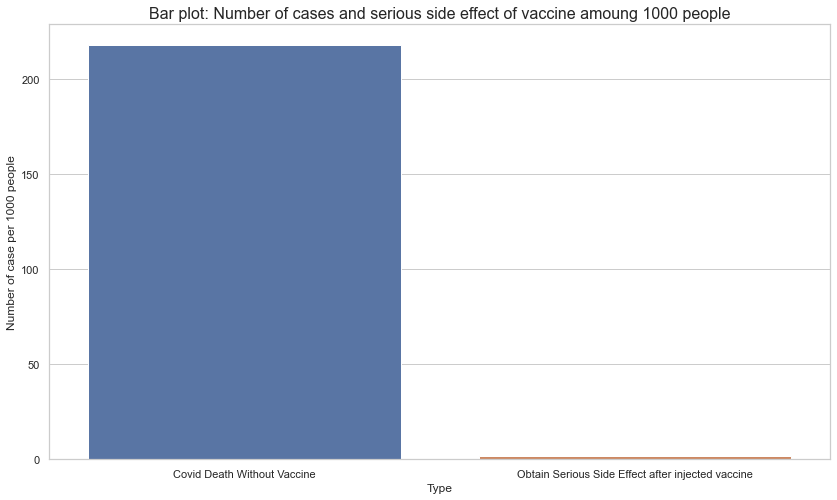

In [62]:
plt.figure(figsize=(14,8))
plot = sns.barplot(data=bar,x='Type',y='Number of case per 1000 people')
plt.title('Bar plot: Number of cases and serious side effect of vaccine amoung 1000 people',fontdict = {'fontsize' : 16})

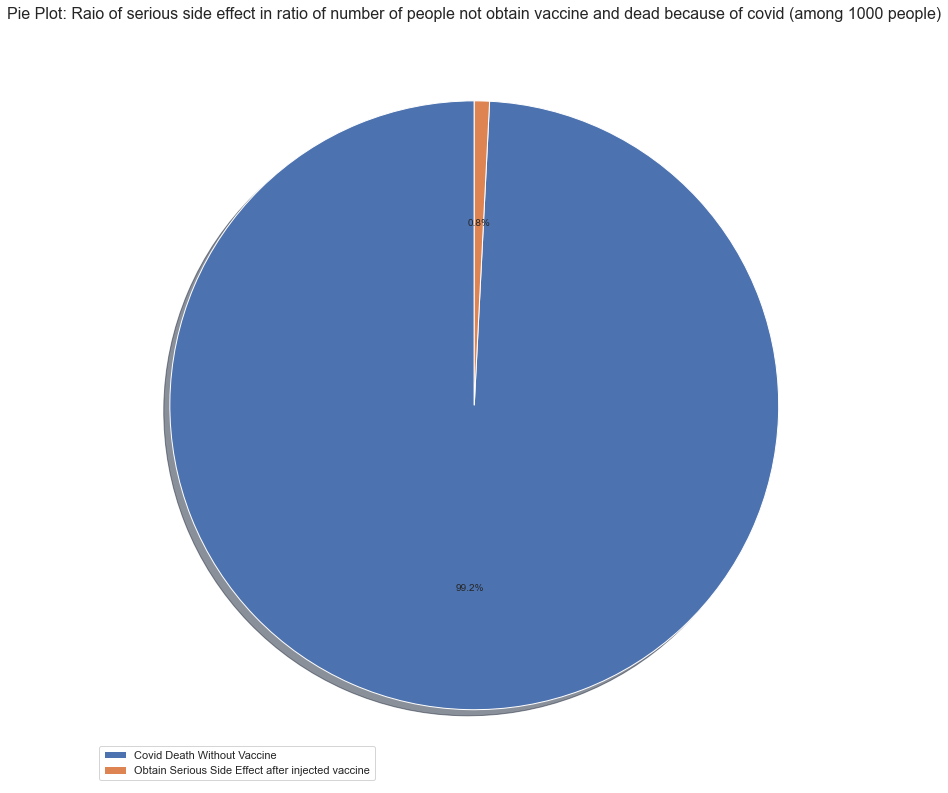

In [63]:
plt.figure(figsize=(20,14))
plt.pie(x=bar['Number of case per 1000 people'], labels= ['',''], autopct='%1.1f%%',shadow=True, startangle=90,)
plt.title('Pie Plot: Raio of serious side effect in ratio of number of people not obtain vaccine and dead because of covid (among 1000 people)',fontdict = {'fontsize' : 16})
plt.legend(loc=3, labels=bar['Type'])

# Questions for Clustering, Classification, Regression (Not only for vaccination dataset)

#### Clustering
* Which states suffer in covid-19
* Which cluster is high risk cluster


#### Regression
* Which date Sarawak can achives Phase 4
* Rate of fully vacinated

#### Classification (???)

# Reference

Clustering: https://www.kaggle.com/ashydv/country-clustering-hierarchical-clustering-pca/notebook